In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("TSLA.csv")

In [3]:
df.shape

(1259, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
df.sort_values(by=['Date'])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000
...,...,...,...,...,...,...,...
1254,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
1255,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
1256,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
1257,2020-07-08,281.000000,283.451996,262.268005,273.175995,273.175995,81556500


In [6]:
#Only date and closing value needed

df1= df

In [7]:
df1.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [8]:
df1

,Date,Close
0,2015-07-10,51.830002
1,2015-07-13,52.431999
2,2015-07-14,53.130001
3,2015-07-15,52.627998
4,2015-07-16,53.335999
...,...,...
1254,2020-07-02,241.731995
1255,2020-07-06,274.316010
1256,2020-07-07,277.971985
1257,2020-07-08,273.175995


In [9]:
import matplotlib.pyplot as plt

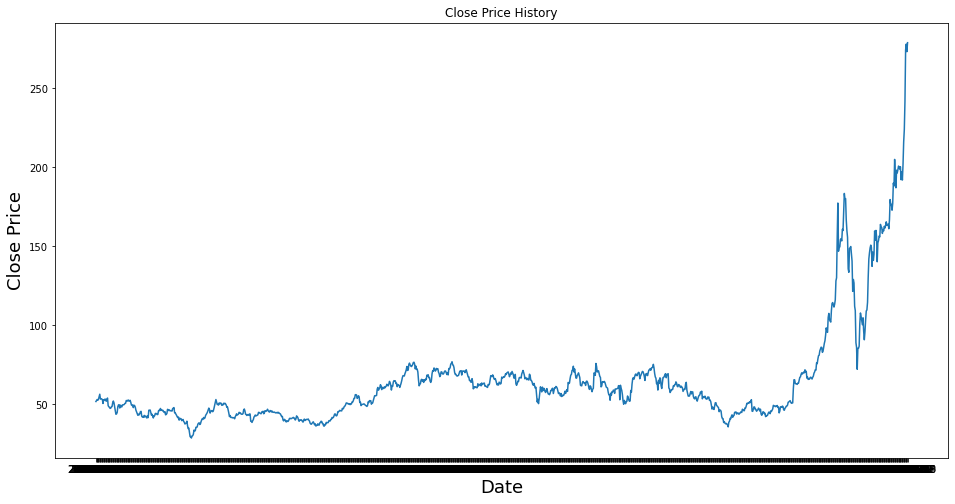

In [10]:
#Visualize the closing price history of training set using the library matplotlib.pyplot

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df1['Date'],df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [11]:
#Create a new dataframe with only the 'Close' column

data=df1.filter(['Close'])

In [12]:
#Convert the dataframe to a NumPy array

dataset=data.values

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#Scale the data using MinMax Scaler

scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
scaled_data= scaler.fit_transform(dataset);

In [16]:
scaled_data

array([[0.09233895],
       [0.09474577],
       [0.09753641],
       ...,
       [0.99646571],
       [0.97729111],
       [1.        ]])

In [17]:
#Create the scaled training dataset

train_set = scaled_data[0:1000, :]

In [18]:
#Split the data into X_train and y_train data sets

X_train=[]
y_train=[]

In [19]:
for i in range(60, 1000):
    X_train.append(train_set[i-60:i, 0])
    y_train.append(train_set[i, 0])

In [20]:
#Convert the x_train to NumPy array

X_train= np.array(X_train)

In [21]:
#Convert the y_train to NumPy array

y_train= np.array(y_train)

In [22]:
#Reshape the data

X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
X_train.shape    #converted into 3-D

(940, 60, 1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [25]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
#Train the model

model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
30/30 [==============================] - 16s 105ms/step - loss: 0.0041
Epoch 2/100
30/30 [==============================] - 3s 109ms/step - loss: 4.8573e-04
Epoch 3/100
30/30 [==============================] - 4s 127ms/step - loss: 1.9791e-04
Epoch 4/100
30/30 [==============================] - 3s 116ms/step - loss: 2.0974e-04
Epoch 5/100
30/30 [==============================] - 3s 109ms/step - loss: 2.0416e-04
Epoch 6/100
30/30 [==============================] - 4s 117ms/step - loss: 1.6618e-04
Epoch 7/100
30/30 [==============================] - 4s 127ms/step - loss: 1.6291e-04
Epoch 8/100
30/30 [==============================] - 4s 119ms/step - loss: 1.5619e-04
Epoch 9/100
30/30 [==============================] - 3s 114ms/step - loss: 1.7866e-04
Epoch 10/100
30/30 [==============================] - 3s 114ms/step - loss: 1.3816e-04
Epoch 11/100
30/30 [==============================] - 4s 131ms/step - loss: 1.2337e-04
Epoch 12/100
30/30 [==============================] - 4

In [28]:
#Create the testing set

test_set=scaled_data[1000 -60:, :]

In [29]:
#Create the datasets x_test and y_test

X_test= []                                
y_test=dataset[1000:, :]     #Actual Values

In [30]:
for i in range(60, len(test_set)):
    X_test.append(test_set[i-60:i,0])

In [31]:
#Convert the data to a NumPy array so that it can be used in the LSTM model

X_test =np.array(X_test)

In [32]:
#Reshape the data

X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
#Get the models predicted price values

predictions=model.predict(X_test)

In [34]:
#Now lets inverse transform the data

predictions = scaler.inverse_transform(predictions)

In [35]:
#Get the root mean squared error (RMSE or Standard Deviation)

rmse = np.sqrt( np.mean( predictions - y_test)**2)

In [36]:
rmse

4.911238217500076

In [37]:
#Plot the data

train= data[:1000]
valid= data[1000:]
valid['Predictions']= predictions

<ipython-input-37-efeef4fdef63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


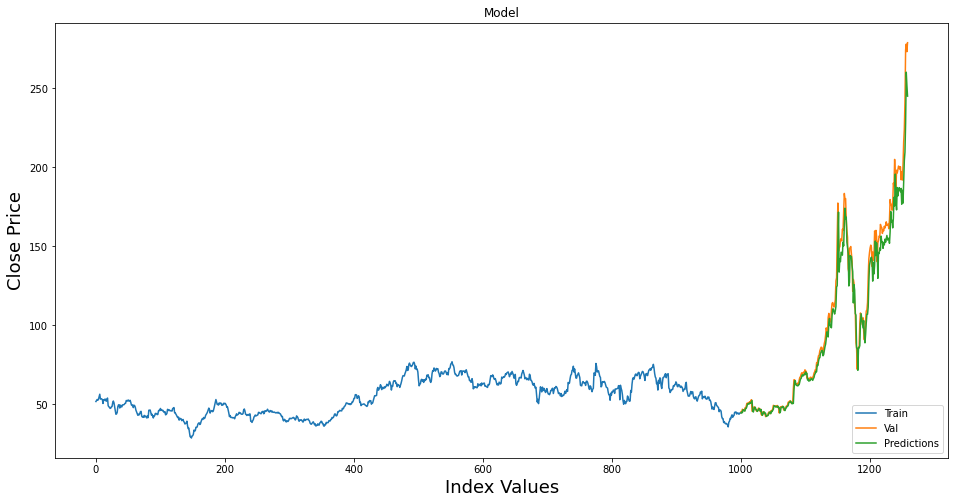

In [38]:
#Visualize the model

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Index Values', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [39]:
#Show the valid and predicted prices

valid

,Close,Predictions
1000,45.433998,44.533424
1001,44.910000,45.225697
1002,46.980000,44.792118
1003,46.619999,46.647442
1004,46.068001,46.474262
...,...,...
1254,241.731995,209.605911
1255,274.316010,228.067291
1256,277.971985,260.189117
1257,273.175995,251.828644
